In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
dataset_dir = "LP-IV-datasets/Object_Detection(Ass6)/caltech-101-img"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [4]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [5]:
# Load VGG16 without top layers
weights_path = "./LP-IV-datasets/Object_Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [6]:
for layer in base_model.layers:
   layer.trainable = False

In [9]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [10]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [12]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 22s 682ms/step - loss: 3.9740 - accuracy: 0.2165 - val_loss: 3.4059 - val_accuracy: 0.2770
Epoch 2/10
32/32 [==============================] - 20s 646ms/step - loss: 2.9721 - accuracy: 0.3540 - val_loss: 2.9512 - val_accuracy: 0.3790
Epoch 3/10
32/32 [==============================] - 23s 728ms/step - loss: 2.4472 - accuracy: 0.4765 - val_loss: 2.6256 - val_accuracy: 0.4460
Epoch 4/10
32/32 [==============================] - 24s 772ms/step - loss: 2.0272 - accuracy: 0.5590 - val_loss: 2.3931 - val_accuracy: 0.4875
Epoch 5/10
32/32 [==============================] - 24s 771ms/step - loss: 1.7215 - accuracy: 0.6195 - val_loss: 2.2097 - val_accuracy: 0.5110
Epoch 6/10
32/32 [==============================] - 24s 771ms/step - loss: 1.4885 - accuracy: 0.6680 - val_loss: 2.1265 - val_accuracy: 0.5245
Epoch 7/10
32/32 [==============================] - 24s 754ms/step - loss: 1.3020 - accuracy: 0.7180 - val_loss: 2.0290 - val_accuracy: 0.5370

In [13]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 30s 914ms/step - loss: 3.1019 - accuracy: 0.3590 - val_loss: 2.4184 - val_accuracy: 0.4720
Epoch 2/10
32/32 [==============================] - 28s 898ms/step - loss: 1.7801 - accuracy: 0.5815 - val_loss: 2.0634 - val_accuracy: 0.5335
Epoch 3/10
32/32 [==============================] - 28s 883ms/step - loss: 1.2162 - accuracy: 0.6890 - val_loss: 1.7678 - val_accuracy: 0.5805
Epoch 4/10
32/32 [==============================] - 28s 885ms/step - loss: 0.7511 - accuracy: 0.8025 - val_loss: 1.7854 - val_accuracy: 0.5895
Epoch 5/10
32/32 [==============================] - 29s 912ms/step - loss: 0.4497 - accuracy: 0.8775 - val_loss: 1.7110 - val_accuracy: 0.6090
Epoch 6/10
32/32 [==============================] - 29s 902ms/step - loss: 0.3047 - accuracy: 0.9165 - val_loss: 1.6498 - val_accuracy: 0.6315
Epoch 7/10
32/32 [==============================] - 28s 879ms/step - loss: 0.1730 - accuracy: 0.9580 - val_loss: 1.8272 - val_accuracy: 0.6160

In [14]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 11s 180ms/step


In [15]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  sunflower
Actual:  sunflower


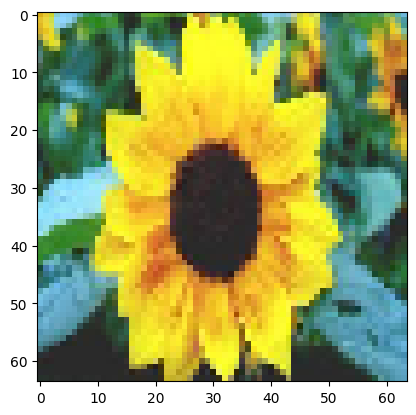

In [17]:
n = 1001
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])